Exercise 9.5: Singular values

Generate an nn matrix, denoted by C, where each entry is 1 with probability p and 0 otherwise. Use
the linear algebra library of Scipy to compute the singular values of C. What can you say about the
relationship between n, p and the largest singular value?

In [64]:
import numpy as np
import scipy.linalg

# p = 0.6

def singular_values(n):
    C = np.random.random((n,n))
    for i in range(0, n):
        for j in range(0, n):
            if C[i][j] <= p:
                C[i][j] = 0
            else:
                C[i][j] = 1
    return C

# n -> 200

a,b,c = scipy.linalg.svd(singular_values(200))
print(b.max())

80.48377506274903


10 Scipy

Exercise 10.1: Least squares
Generate matrix A 2 Rmn with m > n. Also generate some vector b 2 Rm.
Now nd x = arg minx kAx 􀀀 bk2.
Print the norm of the residual.


In [8]:
# matrix A -> R^mxn where m > n
A = np.random.rand(100,80)

# vector b -> R^m
b = np.random.rand(100,1)

# find x using numpy leastsquares
m = np.linalg.lstsq(A,b,rcond=None)[0]

print(np.linalg.norm(m))


1.9839187815107653


Exercise 10.2: Optimization
Find the maximum of the function
f(x) = sin2(x 􀀀 2)e􀀀x2

In [9]:
from scipy import optimize
def f(x):
    return np.sin(x-2)**2 * np.exp(-x**2)

max_func = optimize.fmin(lambda x: -f(x),0)

print(max_func)

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


Exercise 10.3: Pairwise distances

Let X be a matrix with n rows and m columns. How can you compute the pairwise distances between
every two rows?

As an example application, consider n cities, and we are given their coordinates in two columns. Now
we want a nice table that tells us for each two cities, how far they are apart.
Again, make sure you make use of Scipy's functionality instead of writing your own routine.

In [10]:
from scipy.spatial import distance

cities = np.random.rand(10,5)
d = distance.pdist(cities)
print(d)

[0.62001287 0.27087194 0.70046818 0.63328086 0.71690998 0.94545502
 0.82437735 1.01417314 0.71689045 0.82458504 1.09550132 1.11624624
 1.04987846 1.27502495 1.27604237 1.45167352 1.13010769 0.68718549
 0.55516226 0.6191257  1.01259167 0.89805447 1.01708879 0.85532175
 0.90038338 0.59382462 0.80258798 1.0973712  0.8448236  0.89480314
 0.78429781 0.74677463 0.68025795 0.68088555 0.83844628 0.94063757
 1.16251663 0.97889656 1.19044162 0.79250732 0.29475106 0.78679261
 0.74711627 0.50480339 0.80970978]


11 Matplotlib

Exercise 11.1: Plotting a function
Plot the function
f(x) = sin2(x 􀀀 2)e􀀀x2

over the interval [0; 2]. Add proper axis labels, a title, etc.

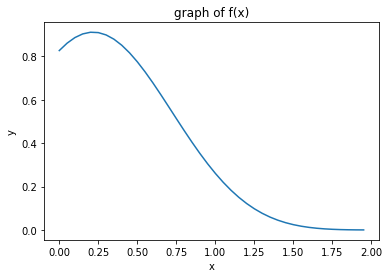

In [24]:
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x-2)**2 * np.exp(-x**2)

x = np.arange(0,2,0.05)

plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('graph of f(x)')
plt.show()


Exercise 11.2: Data

Create a data matrix X with 20 observations of 10 variables. Generate a vector b with parameters Then generate the response vector y = Xb+z where z is a vector with standard normally distributed variables.


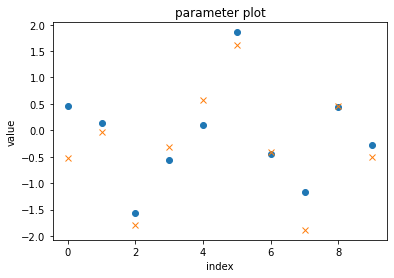

In [65]:
import numpy.matlib as nm

X = nm.randn((20,10))
b = nm.randn((10,1))
z = nm.randn((20,1))

y = X * b + z

x = np.linspace(0,9,10)
B = np.linalg.solve(X.T*X, X.T*y)

bb = plt.plot(x,b,'o',label = 'true parameters')
BB = plt.plot(x,B,'x',label='estimated parameters')

plt.ylabel('value')
plt.xlabel('index')
plt.title('parameter plot')
plt.show()


Exercise 11.3: Histogram and density estimation
Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel density estimator (see scipy.stats). See Figure 2 for an example plot.

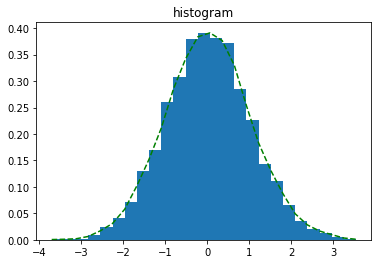

In [41]:
from scipy import stats

z = np.random.normal(size=10000)
bins = 25
n,bins,p=plt.hist(z,bins,density=True,stacked=True)
y = stats.gaussian_kde(z)
plt.plot(bins,y(bins),'g--')
plt.title('histogram')
plt.show()